In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from datetime import datetime
%matplotlib inline

In [111]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [113]:
# Importing the dataset
df = pd.read_csv('Downloads\\hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [114]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [115]:
df.shape # to check rows & columns

(119390, 32)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

In [117]:
# Let's check the features present in our data and then we will look at their data types.
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [118]:
# Cleaning column Company
df.company.unique()[:20]

array([ nan, 110., 113., 270., 178., 240., 154., 144., 307., 268.,  59.,
       204., 312., 318.,  94., 174., 274., 195., 223., 317.])

In [119]:
def clean_company(x):
    try:
        return 'company_'+x.split()[0]
    except:
        return 'company_unknown'

In [120]:
# converting into categorical values
df['company'] = df['company'].apply(clean_company)

df['company'].unique()[:20]

array(['company_unknown'], dtype=object)

In [121]:
df = pd.concat([df,pd.get_dummies(df.company)], axis=1)

In [122]:
df.drop('company', axis=1, inplace=True)

In [31]:
# Cleaning ReservatonStatusDate
# Extracting the Year, Month and Date from the ReservationStatusDate and concating it to the dataframe df and dropping the ReservationStatusDate
# This datetime extraction gives us better features

In [123]:
RSD = pd.DataFrame(pd.to_datetime(df.reservation_status_date).astype('str'))

In [124]:
def clean_RSD(x, dt='d'):
    try:
        if dt=='d':
            dt_no = 2
        elif dt=='m':
            dt_no = 1
        elif dt=='y':
            dt_no = 0
        return list(x)[0].split('-')[dt_no]
    except:
        return x.split('-')[dt_no]

In [125]:
RSD['ReservationStatusDate_year'] = RSD.reservation_status_date.apply(clean_RSD, args=('y')).astype(int)
RSD['ReservationStatusDate_month'] = RSD.reservation_status_date.apply(clean_RSD, args=('m')).astype(int)
RSD['ReservationStatusDate_day'] = RSD.reservation_status_date.apply(clean_RSD, args=('d')).astype(int)

In [126]:
df = pd.concat([df, RSD.iloc[:, 1:]], axis=1)

In [127]:
df.drop('reservation_status_date', axis=1, inplace=True)

In [128]:
# Cleaning ArrivalDateMonth
# Mapping the Month Name into Month number

In [129]:
df['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [130]:
month_to_num = {
    'January': '01',
    'February': '02',
    'March': '03',
    'April': '04',
    'May': '05',
    'June': '06',
    'July': '07',
    'August': '08',
    'September':'09',
    'October': '10',
    'November': '11',
    'December': '12'
}

In [131]:
df['arrival_date_month'] = df['arrival_date_month'].map(month_to_num).astype('int')

In [132]:
# Cleaning Meal
# Label Encoding and Binarizing
# concatenating to df
# dropping original Meal

In [133]:
def meal_parser(x):
    if x!='Undefined':
        return x.split(' ')[0]
    else:
        return 'Undefined'

In [134]:
meal_data = df.meal.apply(meal_parser)
meal_data = pd.get_dummies(meal_data)

In [135]:
# adding `meal_data`
df = pd.concat([df, meal_data], axis=1)
# dropping `Meal`
df.drop('meal', axis=1, inplace=True)

In [136]:
# Cleaning ReservationStatus
# Label Encoding
# Dropping ReservationStatus

In [137]:
df = pd.concat([df, pd.get_dummies(df.reservation_status)],axis=1)

In [138]:
df.drop('reservation_status', axis=1, inplace=True)

In [139]:
# Cleaning Country

# one hot encoding `Country`
country_col = pd.get_dummies(df.country)

# creating column names
country_col_names = ['country_'+str(con) for con in list(country_col.columns)]
# adding column names
country_col.columns = country_col_names

# concatenating to the main DataFrame
df = pd.concat([df, country_col], axis=1)

In [140]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults',
       ...
       'country_UMI', 'country_URY', 'country_USA', 'country_UZB',
       'country_VEN', 'country_VGB', 'country_VNM', 'country_ZAF',
       'country_ZMB', 'country_ZWE'],
      dtype='object', length=217)

In [141]:
# Cleaning Customer Type

df = pd.concat([df, pd.get_dummies(df.customer_type)],
                    axis=1)
df.drop('customer_type', axis=1, inplace=True)

In [142]:
# Cleaning Distribution Channel

df = pd.concat([df, pd.get_dummies(df.distribution_channel)],
                    axis=1)
df.drop('distribution_channel', axis=1, inplace=True)

In [143]:
# Cleaning Market Segment


df = pd.concat([df, pd.get_dummies(df.market_segment )],
                    axis=1)
df.drop('market_segment', axis=1, inplace=True)


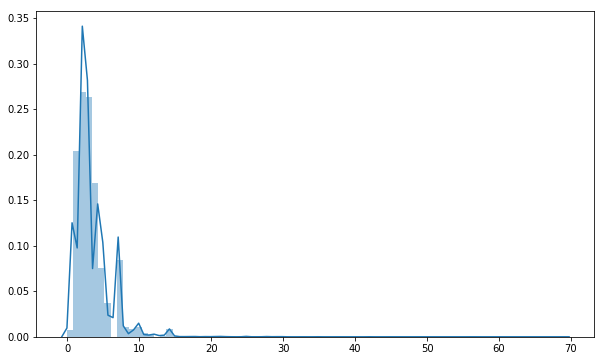

In [144]:
Stays_in_total = df.stays_in_week_nights  + df.stays_in_weekend_nights
plt.figure(figsize=(10, 6))
# plotting the dist plot of the Total number od stays
sns.distplot(Stays_in_total, bins=80)

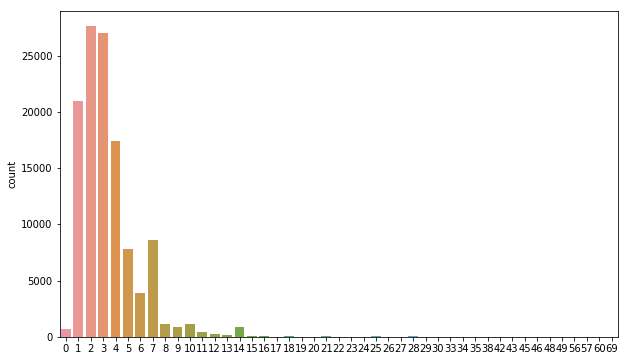

In [145]:

plt.figure(figsize=(10, 6))
sns.countplot(Stays_in_total)

### We can clearly see that the maximum stays on average are 2-3 days and exponentially decreases as the number of days increase

In [146]:
# Count of customers from countries
country_counts = df.country.value_counts()

# Countries with highest customers
country_counts[0:5]

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
Name: country, dtype: int64

In [147]:
country_counts[:9]

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
Name: country, dtype: int64

In [148]:
# percentage dataframe
percent_of_country_cust = country_counts/np.sum(country_counts)*100

Text(0.5, 0, 'Countries')

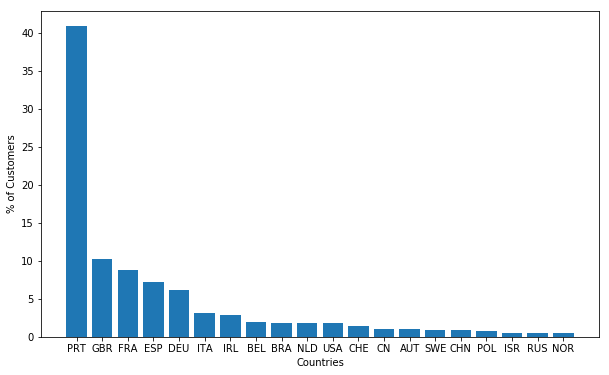

In [149]:
plt.figure(figsize=(10, 6))
# plotting the top `n` countries
n_countries = 20
plt.bar(list(percent_of_country_cust.index)[:n_countries],
        percent_of_country_cust.values[:n_countries])
plt.ylabel('% of Customers')
plt.xlabel('Countries')


### We can infer from the above that the hotels are mostly located in Europe. Mostly in Portugal, Greate Britain, France and Spain, Denmark and Italy

In [67]:
# Using a correlation matrix to visualize the relationships between various features in the dataset.

In [150]:
all_cols = list(df.columns)

In [151]:
cols_to_corr = [
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
'adr']

C:\Users\jane alam\AppData\Roaming\Python\Python37\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\jane alam\AppData\Roaming\Python\Python37\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


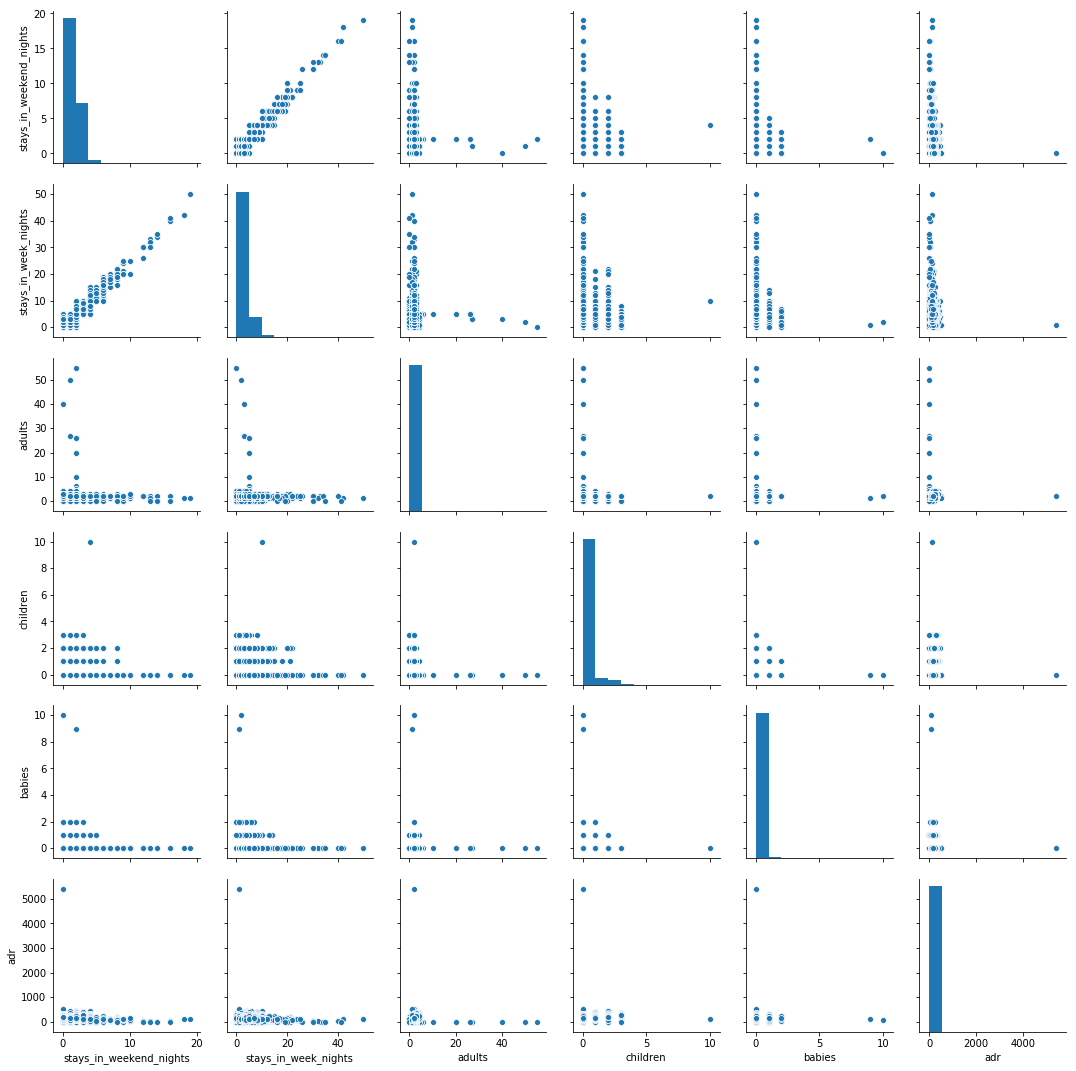

In [152]:
sns.pairplot(df[cols_to_corr])

###  StaysinWeekNights & StaysinWeekendNights are highly correlated
### Large Groups of Adults do not stay for more than a week on average where as smaller groups of 1-5 book mostly between a week or a fornight

In [156]:
col_names_corr = ['adr','adults',
'stays_in_weekend_nights',
'stays_in_week_nights']

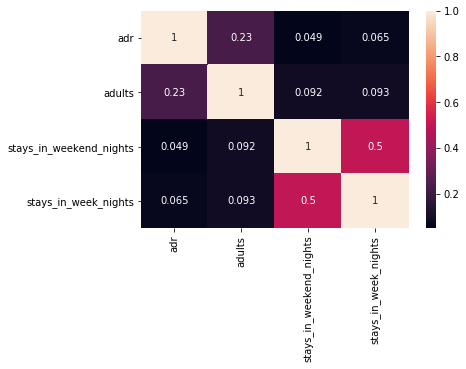

In [184]:
sns.heatmap(np.corrcoef([df.adr, df.adults,
             df.stays_in_weekend_nights,
            df.stays_in_week_nights]), annot=True,
            yticklabels=col_names_corr,
            xticklabels=col_names_corr)

In [187]:
# Label
y = df.Canceled
# Features

X = df.drop('Canceled', axis=1)
X.drop(['is_canceled', 'Check-Out'], axis=1, inplace=True)


C:\New folder\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [189]:
lr = LogisticRegression()
# training a linear model
lr.fit(X_train, y_train)

C:\New folder\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [190]:
# predicting values
pred = lr.predict(X_test)

# plotting results
print(confusion_matrix(y_test, pred))

print(classification_report(y_test, pred))

[[22700  2437]
 [ 4717  9545]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86     25137
           1       0.80      0.67      0.73     14262

   micro avg       0.82      0.82      0.82     39399
   macro avg       0.81      0.79      0.80     39399
weighted avg       0.82      0.82      0.81     39399



In [191]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

C:\New folder\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [192]:
# predicting values
pred_rf = rf_model.predict(X_test)

# plotting results
print(confusion_matrix(y_test, pred_rf))

print(classification_report(y_test, pred_rf))

[[24764   373]
 [ 2166 12096]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     25137
           1       0.97      0.85      0.91     14262

   micro avg       0.94      0.94      0.94     39399
   macro avg       0.94      0.92      0.93     39399
weighted avg       0.94      0.94      0.93     39399

